# Black Holes collisions - LaCoNGA (June 29, 2021)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Black_Hole_Merger.jpg/800px-Black_Hole_Merger.jpg)

Credit: Wikipedia

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 This is the black holes collision part of the course
 (2021).
 
    by: J.M, Ramírez

 </p>
</div>

***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laconga-bhs-collisions-pics/Rocket_2021_small.png
/kaggle/input/laconga-bhs-collisions-pics/Rocket_2021.002.png


In [2]:
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.axisartist.axislines import AxesZero
import subprocess
import sys
import re

import warnings
import arviz as az
import pymc3 as pm
warnings.simplefilter(action="ignore", category=FutureWarning)
###
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on ArviZ v{az.__version__}")

###
import io
from PIL import Image
import matplotlib as mpl

Running on ArviZ v0.11.2


In [3]:
def doall(EqTitle,OneEq,locEq=0.2,FC="white"):
    # Colors used in Matplotlib online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(7, 0.8))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor=FC, frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title(EqTitle,
                        color=mpl_grey_rvb, fontsize=24, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Plotting formula
    plt.annotate(OneEq,
                 xy=(locEq,0.3),
                 color=mpl_orange_rvb, ha='center', fontsize=35)
    plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Relativity and Geometry

 </p>
</div>

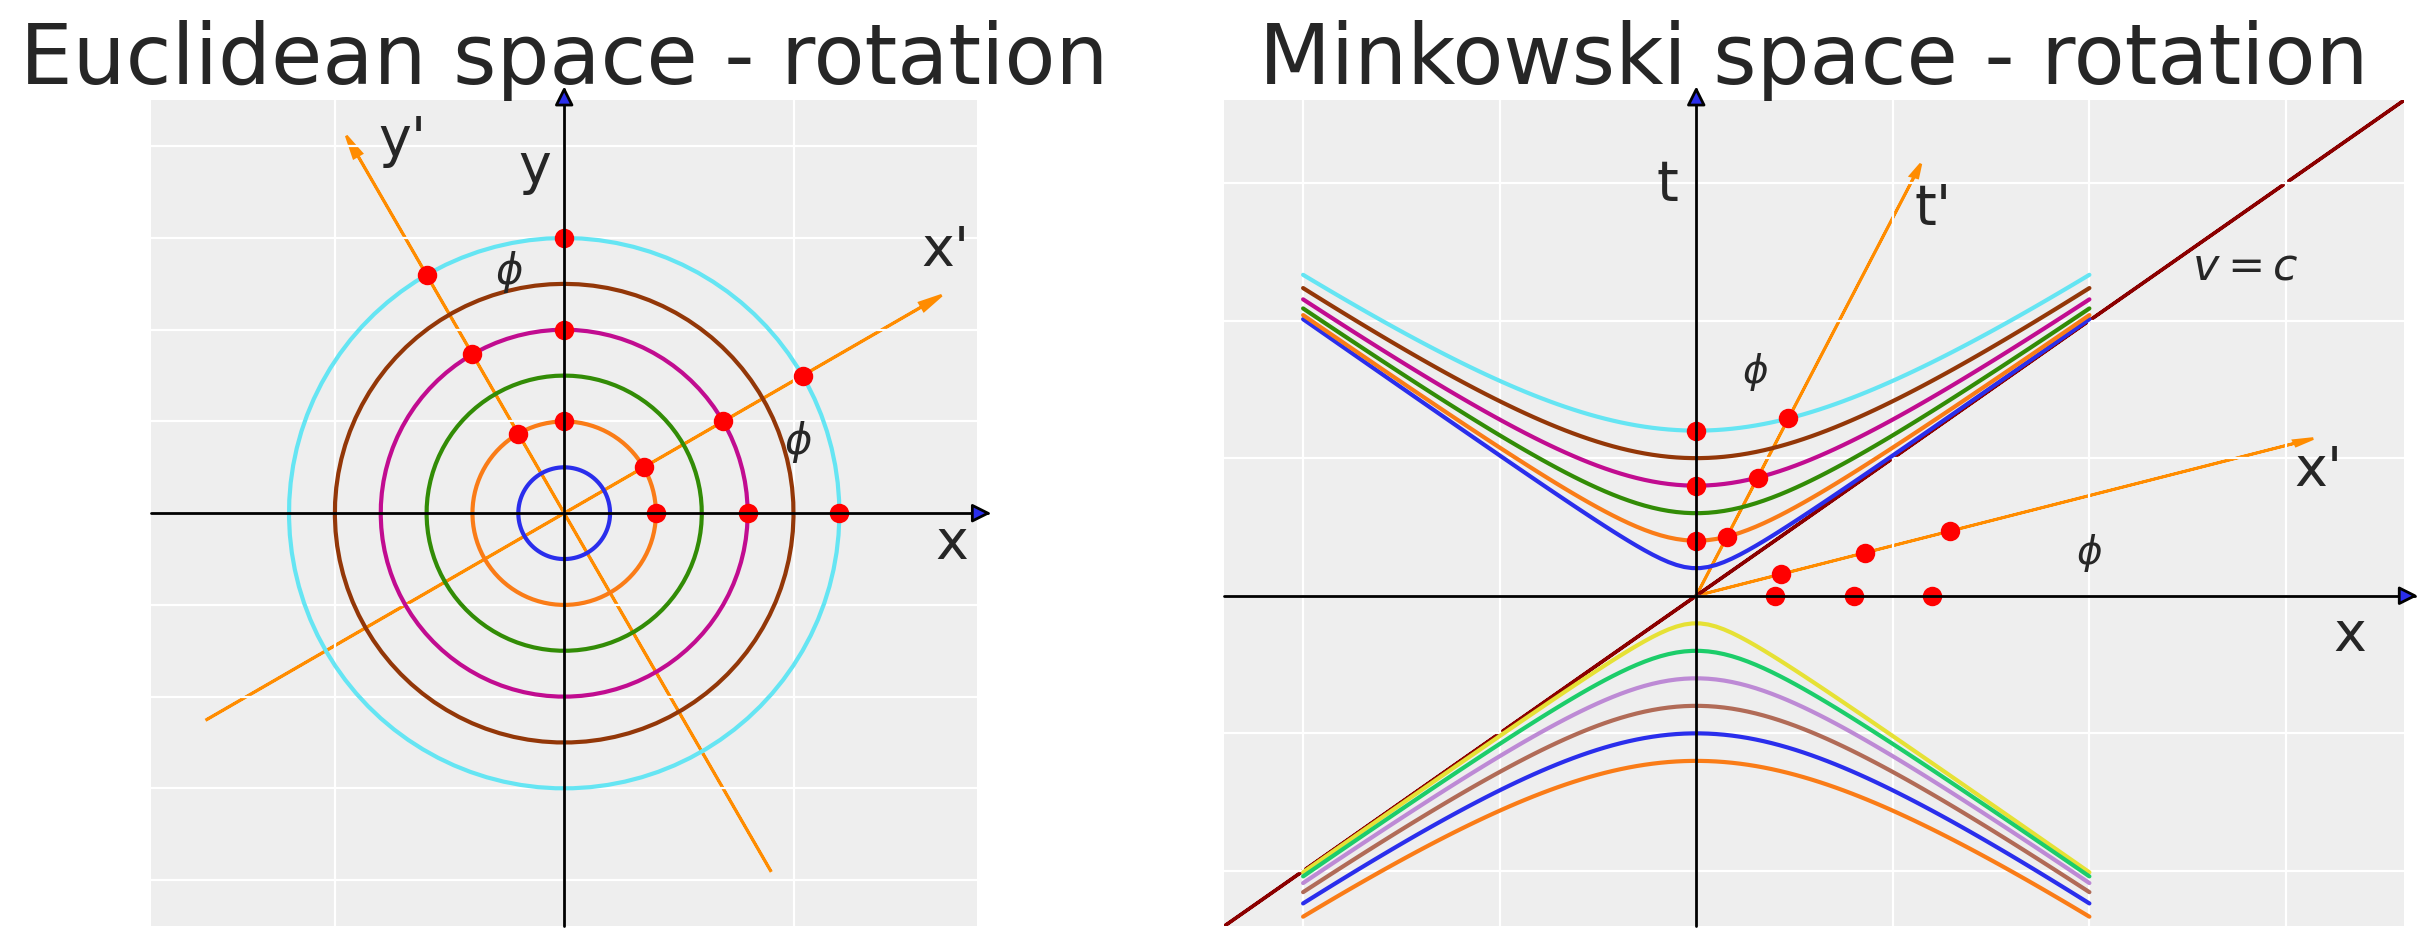

In [4]:
## A plot with physics --
x = np.array([0.,0.,0.,0.,0.,0.])
y = np.array([0.,0.,0.,0.,0.,0.])
r = np.array([0.1,0.2,0.3,0.4,0.5,0.6])

phi = np.linspace(0.0,2*np.pi,100)
na=np.newaxis


# the first axis of these arrays varies the angle, 
# the second varies the circles
x_line = x[na,:]+r[na,:]*np.sin(phi[:,na])
y_line = y[na,:]+r[na,:]*np.cos(phi[:,na])

### For the Hyperbolas -t^2 + x^2 = -b^2
bp=[0.1,0.2,0.3,0.4,0.5,0.6]
x_paraB1 = np.linspace(-1,1,100)

x_paraB = np.transpose([x_paraB1 for tk in bp])
t_paraB = np.transpose([np.sqrt(x_paraB1**2 + tk**2) for tk in bp])
t_paraBN = - t_paraB
#
    
 
fig = plt.figure(figsize = (25, 17))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.7)


## Some Transformation
base = plt.gca().transData

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)


## Square of the plot 
xl,xh = -1.2, 1.8
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)

## The Hyperbolas,
plt.plot(x_paraB, t_paraB,'-')
plt.plot(x_paraB, t_paraBN,'-')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


## Rotated y axe
angle_t = -20
rot_t = transforms.Affine2D().rotate_deg(angle_t)
x_tail = 0.
y_tail = 0.
y_head = yh*0.9
x_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_t + base) #
## Some points (y axe)
xhAb=np.array([0.2, 0.4, 0.6])
plt.plot([0,0,0],xhAb,'ro')
## SR theory
t1=(1/np.sqrt(1-np.tan(angle_t*np.pi/(180))**2))*xhAb  # (1/pow(1-pow(np.tan(-20*np.pi/(180)),2),1/2))*0.3
x1=np.sqrt(-xhAb**2 + t1**2)                           # pow(-pow(0.3,2)+pow(t1,2),1/2)
##
plt.plot(x1,t1,'ro')


## Rotated x axe
angle_x = (-1)*angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
y_tail = 0.
x_tail = 0.
x_head = xh*0.9
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_x + base
        )
## Some points (x axe)
plt.plot(xhAb,[0,0,0],'ro')
## SR theory (switch  [t <-> x] )
plt.plot(t1,x1,'ro')

# Rotated t' and x'
plt.annotate('x\'',(0.9*xh*np.cos(angle_x*np.pi/(180)), 0.65*xh*np.sin(angle_x*np.pi/(180))),  fontsize=20)
plt.annotate('t\'',(0.9*xh*np.cos(np.pi/2-angle_x*np.pi/(180)), 0.8*xh*np.sin(np.pi/2-angle_x*np.pi/(180))),  fontsize=20)
# Ploting t,x --
plt.annotate("x",(0.9*xh, -0.2),  fontsize=20)
plt.annotate("t",(-0.1, 0.8*yh),  fontsize=20)


# angle text
t1=t1[-1]
x1=x1[-1]
###
plt.annotate('$\phi$',(x1*0.5,t1*1.2),  fontsize=14)
#
plt.annotate('$\phi$',(t1*1.5,x1*0.5),  fontsize=14)


## One thick red line for v=c
angle_c = 45
rot_c = transforms.Affine2D().rotate_deg(angle_c)
y_tail = 0.
x_tail = 2*xl
x_head = xh*2.
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head+dx, y_head+dy, head_width=0.02, lw=1.2,
         head_length=0.05, fc='darkred', ec='darkred', transform= rot_c + base
        )
# SR theory v = c 
plt.annotate('$v=c$',(xh*0.7,yh*0.64),  fontsize=16)
######################################################################################

## A Title
plt.title("Minkowski space - rotation",  fontsize=30)

#################################################################################################
###################### Segunda figura ...
#################################################################################################
ax = fig.add_subplot(4,2,1, axes_class=AxesZero, aspect=1)

## Some Transformation
angle_rot=30
base = plt.gca().transData
rot = transforms.Affine2D().rotate_deg(angle_rot)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

## Square o the plot 
xl,xh = -.9, .9
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)

## The circles,
plt.plot(x_line,y_line,'-')



## Some points (y axe)
xhAb=np.array([0.2, 0.4, 0.6])
plt.plot([0,0,0],xhAb,'ro')
plt.plot([0,0,0],xhAb,'ro' , transform= rot + base)
## Some points (x axe)
plt.plot(xhAb,[0,0,0],'ro')
plt.plot(xhAb,[0,0,0],'ro' , transform= rot + base)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)

## Rotated y axe
x_tail = 0.
y_tail = yl
x_head = 0.
y_head = yh*0.5
dx = x_head - x_tail
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head+dx, y_head+dy, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot + base
        )
## Rotated x axe
y_tail = 0.
x_tail = xl
y_head = 0.
x_head = xh*0.5
dx = x_head - x_tail 
dy = y_head - y_tail
ax.arrow(x_tail, y_tail, x_head+dx, y_head+dy, head_width=0.02, 
         head_length=0.05, fc='darkorange', ec='darkorange',  transform= rot + base
        )
# Rotated angles
plt.annotate("x",(0.9*xh, -0.1),  fontsize=20)
plt.annotate("y",(-0.1, 0.8*yh),  fontsize=20)
plt.annotate('x\'',(xh*np.cos(angle_rot*np.pi/(180)), 1.2*xh*np.sin(angle_rot*np.pi/(180))),  fontsize=20)
plt.annotate('y\'',(0.9*xh*np.cos(np.pi/2+angle_rot*np.pi/(180)), xh*np.sin(np.pi/2+angle_rot*np.pi/(180))),  fontsize=20)

# angle text
#t1=xhAb[-1]*np.sin(angle_rot*np.pi/(180))
#x1=0.3*xhAb[-1]*np.cos(angle_rot*np.pi/(180))
plt.annotate('$\phi$',(-0.15,0.5),  fontsize=15)
plt.annotate('$\phi$',(0.48,0.13),  fontsize=15)

## A Title
plt.title("Euclidean space - rotation",  fontsize=30)

#plt.legend()
plt.show()

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">   

# Special relativity is encoded in the geometry of Minkowski space 📌
    
</div>    

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Relativity and Geometry

 </p>
</div>

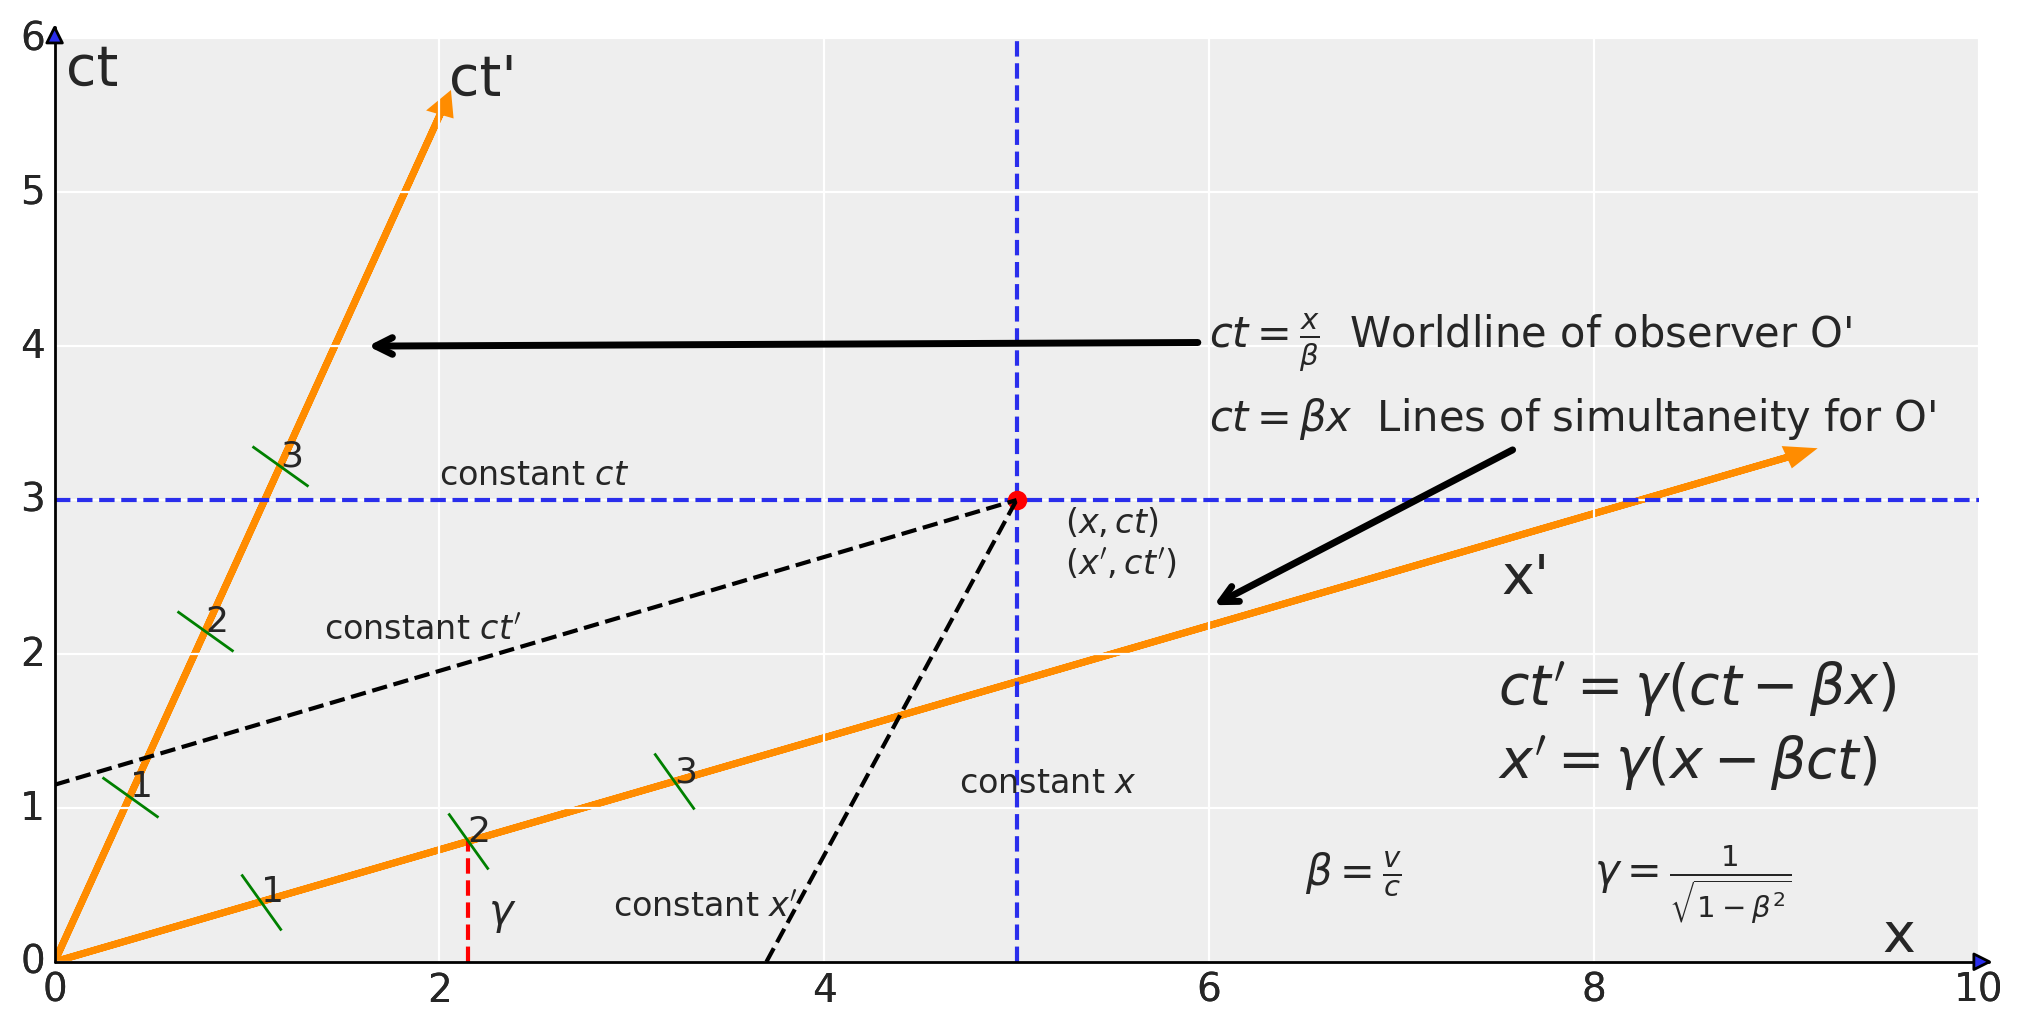

In [5]:
fig = plt.figure(figsize = (10, 13))
ax = fig.add_subplot(1,1,1, axes_class=AxesZero, aspect=0.8)


## Some Transformation
base = plt.gca().transData

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

## Square of the plot 
xl,xh = 0., 10.
yl,yh = xl,6.
plt.xlim(xl,xh)
plt.ylim(yl,yh)

########################################################################################
## Rotated y axe
angle_t = -20
rot_t = transforms.Affine2D().rotate_deg(angle_t)
x_tail = 0.
y_tail = 0.
y_head = yh*0.98
x_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.09, lw=2.5,
         head_length=0.1, fc='darkorange', ec='darkorange', transform= rot_t + base) #

########################################################################################
## Some points (y axe)
xhAb=np.array([1, 2, 3])
## SR theory
t1=(1/np.sqrt(1-np.tan(angle_t*np.pi/(180))**2))*xhAb
x1=np.sqrt(-xhAb**2 + t1**2)
##
symbol=["1","2","3"]
for i,l in enumerate(symbol):
    #plt.plot(x1[i],t1[i],'go', marker=r"$ {} $".format(l), markersize=12)
    tm = mpl.markers.MarkerStyle(marker='|')
    tm._transform = tm.get_transform().rotate_deg(55)
    plt.plot(x1[i],t1[i],'g', marker=tm, markersize=25)
    plt.annotate(str(xhAb[i]),(x1[i],t1[i]),  fontsize=13)
########################################################################################

###
########################################################################################
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.
x_head = yh*1.6
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.09, lw=2.5,
         head_length=0.1, fc='darkorange', ec='darkorange', transform= rot_x + base) #

########################################################################################
## Some points (x axe)
## SR theory
t1=(1/np.sqrt(1-np.tan(angle_t*np.pi/(180))**2))*xhAb
x1=np.sqrt(-xhAb**2 + t1**2)
##
for i,l in enumerate(symbol):
    #plt.plot(x1[i],t1[i],'go', marker=r"$ {} $".format(l), markersize=12)
    tm = mpl.markers.MarkerStyle(marker='|')
    tm._transform = tm.get_transform().rotate_deg(35)
    plt.plot(t1[i],x1[i],'g', marker=tm, markersize=25)
    plt.annotate(str(xhAb[i]),(t1[i],x1[i]),  fontsize=13)
plt.vlines(t1[1],0.,x1[1], linestyle='--', color='r')
plt.annotate('$\gamma$',(t1[1]*1.05,0.25),  fontsize=15)
########################################################################################


## Anotate axes
plt.annotate("x",(0.95*xh, 0.07),  fontsize=20)
plt.annotate("ct",(0.06, 0.95*yh),  fontsize=20)
# Rotated ct' & x'
plt.annotate('x\'',(0.8*xh*np.cos(angle_x*np.pi/(180)), 0.7*xh*np.sin(angle_x*np.pi/(180))),  fontsize=20)
plt.annotate('ct\'',(yh*np.cos(np.pi/2-angle_x*np.pi/(180)), yh*np.sin(np.pi/2-angle_x*np.pi/(180))),  fontsize=20)


## H&V Lines
x1=5
y1=3
plt.hlines(y1,0.,11., linestyle='--')
plt.annotate('constant $ct$',(2.0,3.1),  fontsize=12)
plt.vlines(x1,0.,11., linestyle='--')
plt.annotate('constant $x$',(4.7,1.1),  fontsize=12)
## point intersec
plt.plot([x1],[y1],'ro')
plt.annotate('($x, ct$)',(x1*1.05,y1*.93),  fontsize=12)
plt.annotate('($x\', ct\'$)',(x1*1.05,y1*.84),  fontsize=12)


## Ploting two lines of simultaneity --
plt.plot([0.,x1],[1.15,y1],'k',linestyle='--')
plt.annotate('constant $ct\'$',(1.4,2.1),  fontsize=12)
plt.plot([3.7,x1],[0.,y1],'k',linestyle='--')
plt.annotate('constant $x\'$',(2.9,0.3),  fontsize=12)

########################################################################################
########################################################################################
## Notes
ax.annotate(r'$ct = \frac{x}{\beta}$  Worldline of observer'+" O\'", 
            xy=(1.6,4),#(0.3*yh*np.cos(np.pi/2-angle_x*np.pi/(180)), 0.8*yh*np.sin(np.pi/2-angle_x*np.pi/(180))), 
            xytext=(6, 4),   fontsize=15,
            arrowprops=dict(arrowstyle="->",lw=2.5))
##
ax.annotate(r'$ct = \beta x$  Lines of simultaneity for'+" O\'", 
            xy=(6,2.3), 
            xytext=(6, 3.45),   fontsize=15,
            arrowprops=dict(arrowstyle="->",lw=2.5))
##
ax.annotate("$ct\'$"+r"$= \gamma(ct-\beta x)$", 
            (7.5, 2.1*0.8),   fontsize=20,
            )
##
ax.annotate("$x\'$"+r"$ = \gamma(x-\beta ct)$", 
            (7.5, 1.5*0.8),   fontsize=20,
            )
##
ax.annotate(r"$\beta = \frac{v}{c}$", 
            (6.5, .5),   fontsize=15,
            )
##
ax.annotate(r"$\gamma = \frac{1}{\sqrt{1-\beta^2}}$", 
            (8., .5),   fontsize=15,
            )
########################################################################################
########################################################################################


plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Invariant interval

 </p>
</div>

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


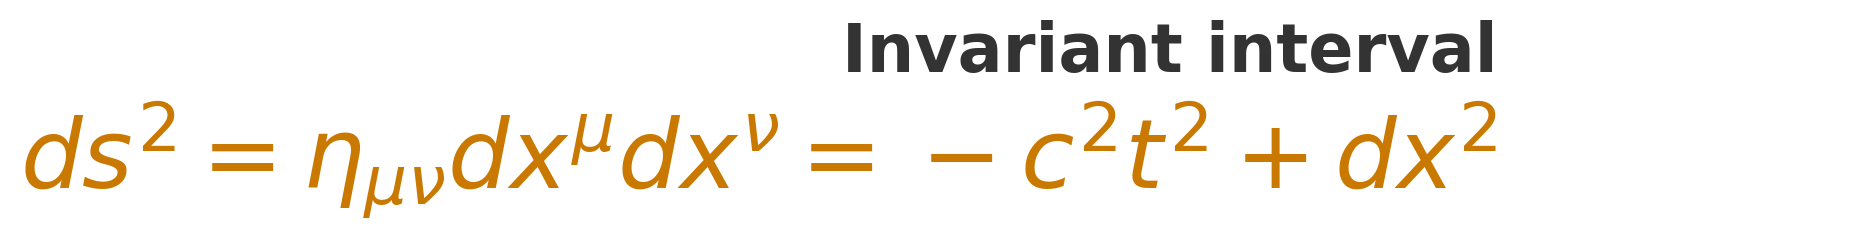

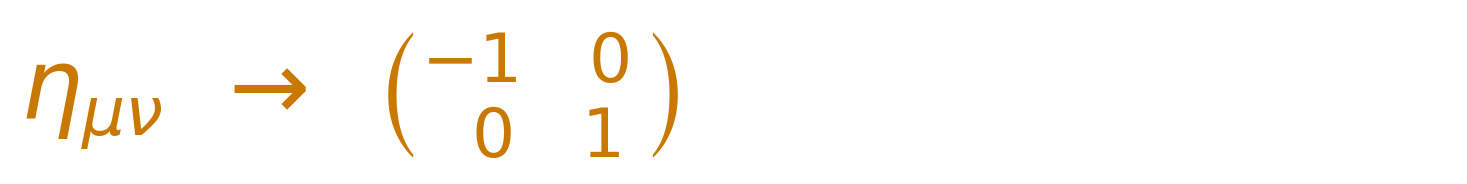

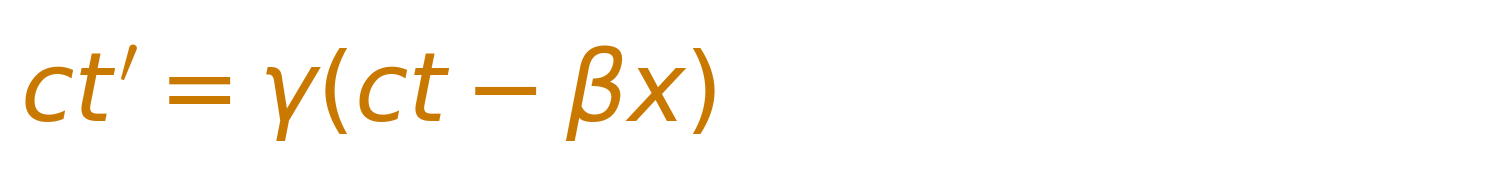

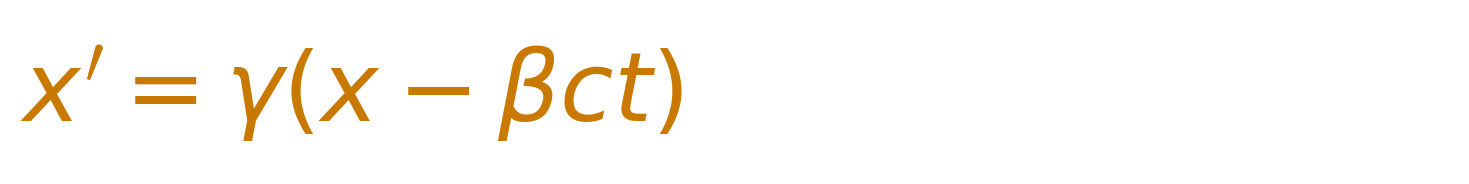

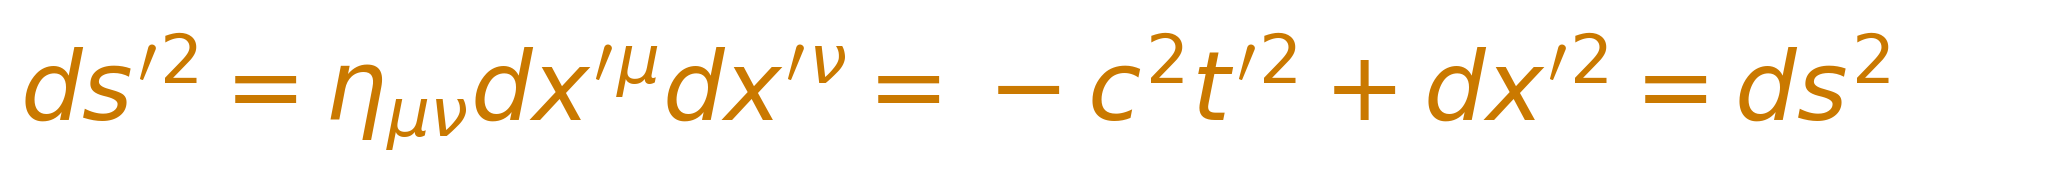

In [6]:
## Here we write the Eq.
mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
myEq1={1: 
    r"$ds^2 = "
    r"\eta_{\mu \nu}dx^{\mu}dx^{\nu} = "
    r"-c^2t^2 + dx^2$",
    2:
    r"$ct'= \gamma(ct-\beta x)$",
    3:
    r"$x'= \gamma(x-\beta ct)$",
    4:
    r"$\eta_{\mu \nu} ~~\to~~ \binom{-1~~~0}{~~0~~~1}$",
    5: 
    r"$ds'^2 = "
    r"\eta_{\mu \nu}dx'^{\mu}dx'^{\nu} = "
    r"-c^2t'^2 + dx'^2 ="
    r"ds^2$",
}
myTitle='Invariant interval'    
## Here we plot it    
doall(myTitle,myEq1[1])
## metric
doall('',myEq1[4],0.2)
doall('',myEq1[2])
doall('',myEq1[3])
doall('',myEq1[5])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Time Dilation

 </p>
</div>

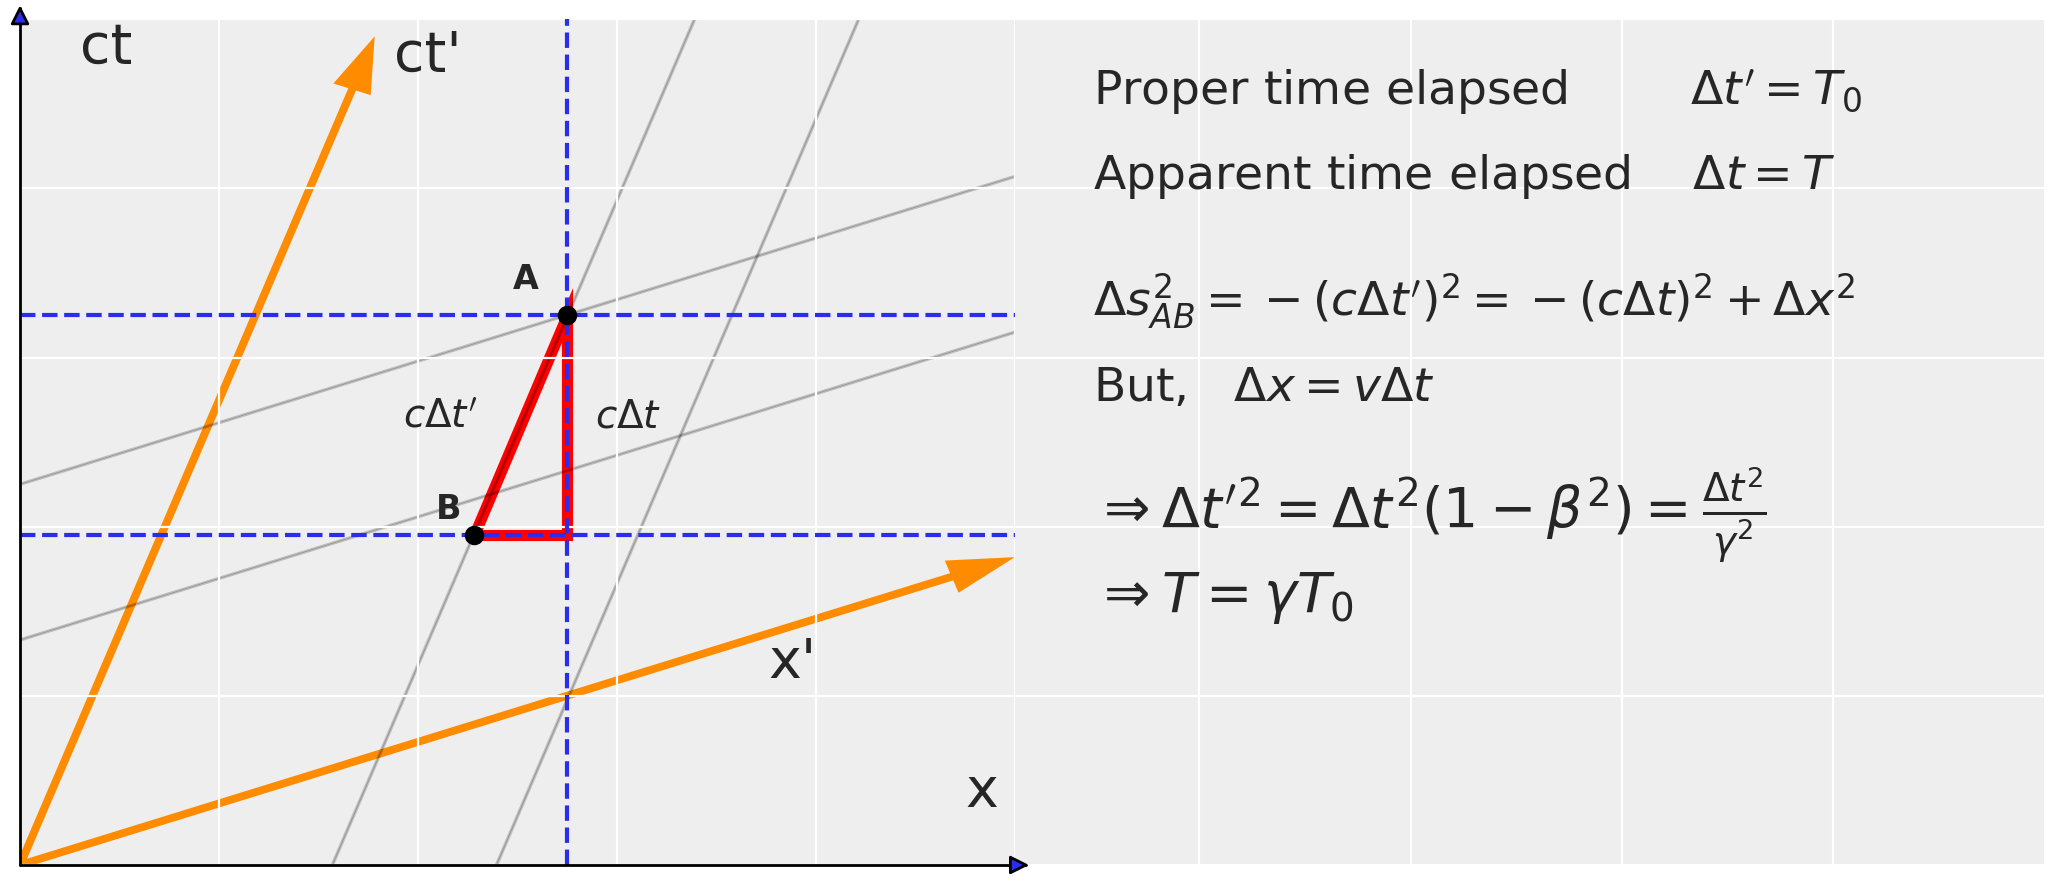

In [7]:
fig = plt.figure(figsize = (20, 17))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.8)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


########################################################################################
########################################################################################
## Notes
##
ax.annotate("Proper time elapsed        $\Delta t' = T_0$", 
            (0.1,0.9),   fontsize=17,
            )
##
ax.annotate("Apparent time elapsed    $\Delta t = T$", 
            (0.1,0.8),   fontsize=17,
            )
##
ax.annotate("$\Delta s^2_{AB} = - (c\Delta t')^2 = - (c\Delta t)^2  + \Delta x^2$", 
            (0.1,0.65),   fontsize=17,
            )
##
ax.annotate("But,   $\Delta x=v \Delta t$", 
            (0.1,0.55),   fontsize=17,
            )
##
ax.annotate(r"$\Rightarrow \Delta t'^2= \Delta t^2 (1-\beta^2)=\frac{\Delta t^2}{\gamma^2}$", 
            (0.1,0.4),   fontsize=20,
            )
##
ax.annotate(r"$\Rightarrow T=\gamma T_0$", 
            (0.1,0.3),   fontsize=20,
            )

######  End Notes ...
########################################################################################



#########################################################################################################################
#########################################################################################################################
### Right part for annnotations ( 2 )

ax = fig.add_subplot(4,2,1, axes_class=AxesZero, aspect=0.85)
## Some Transformation
base = plt.gca().transData

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)

ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)
########################################################################################
## Rotated y axe
angle_t = -20
rot_t = transforms.Affine2D().rotate_deg(angle_t)
x_tail = 0.
y_tail = 0.
y_head = yh*0.98
x_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.03, lw=2.5,
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_t + base) #
########################################################################################
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.
x_head = yh*1.
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.03, lw=2.5,
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_x + base) #
########################################################################################
########################################################################################

## Anotate axes
plt.annotate("x",(0.95*xh, 0.07),  fontsize=20)
plt.annotate("ct",(0.06, 0.95*yh),  fontsize=20)
# Rotated ct' & x'
plt.annotate('x\'',(0.8*xh*np.cos(angle_x*np.pi/(180)), 0.65*xh*np.sin(angle_x*np.pi/(180))),  fontsize=20)
plt.annotate('ct\'',(1.1*yh*np.cos(np.pi/2-angle_x*np.pi/(180)), yh*np.sin(np.pi/2-angle_x*np.pi/(180))),  fontsize=20)


## H&V Lines
x1=0.55
y1=0.65
plt.hlines(y1,0.,11., linestyle='--')
plt.hlines(y1*0.6,0.,11., linestyle='--')
plt.vlines(x1,0.,11., linestyle='--')
## point intersec
plt.plot([x1],[y1],'ko')
plt.annotate('A',(x1*0.9,y1*1.05),  fontsize=12,weight="bold")
plt.plot([x1*0.83],[(y1*0.6)],'ko')
plt.annotate('B',(x1*0.76,(y1*0.6)*1.05),  fontsize=12,weight="bold")
plt.annotate("$c\Delta t'$",(x1*0.7,(y1*0.76)*1.05),  fontsize=14,weight="bold")
plt.annotate("$c\Delta t$",(x1*1.05,(y1*0.76)*1.05),  fontsize=14,weight="bold")

# a Triangle
pivot_left = (x1*0.83, y1*0.6)
pivot_right = (x1,y1*0.6)
pivot_top = (x1, y1)
points = np.array([pivot_left, pivot_right, pivot_top])
pivot = plt.Polygon(points, closed=True, fill=False, edgecolor='r', lw=4.)
ax.add_patch(pivot)

##############################################################################################
##############################################################################################
## Ploting two lines of simultaneity --
##############################################################################################
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.423
x_head = yh*1.5
y_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.25
x_head = yh*1.5
y_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
##############################################################################################
## Rotated t axe
angle_x = angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.295
y_tail = 0.
y_head = yh*1.5
x_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
## Rotated t axe
angle_x = angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.45
y_tail = 0.
y_head = yh*1.5
x_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
##############################################################################################
##############################################################################################

plt.show()

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Length Contraction

 </p>
</div>

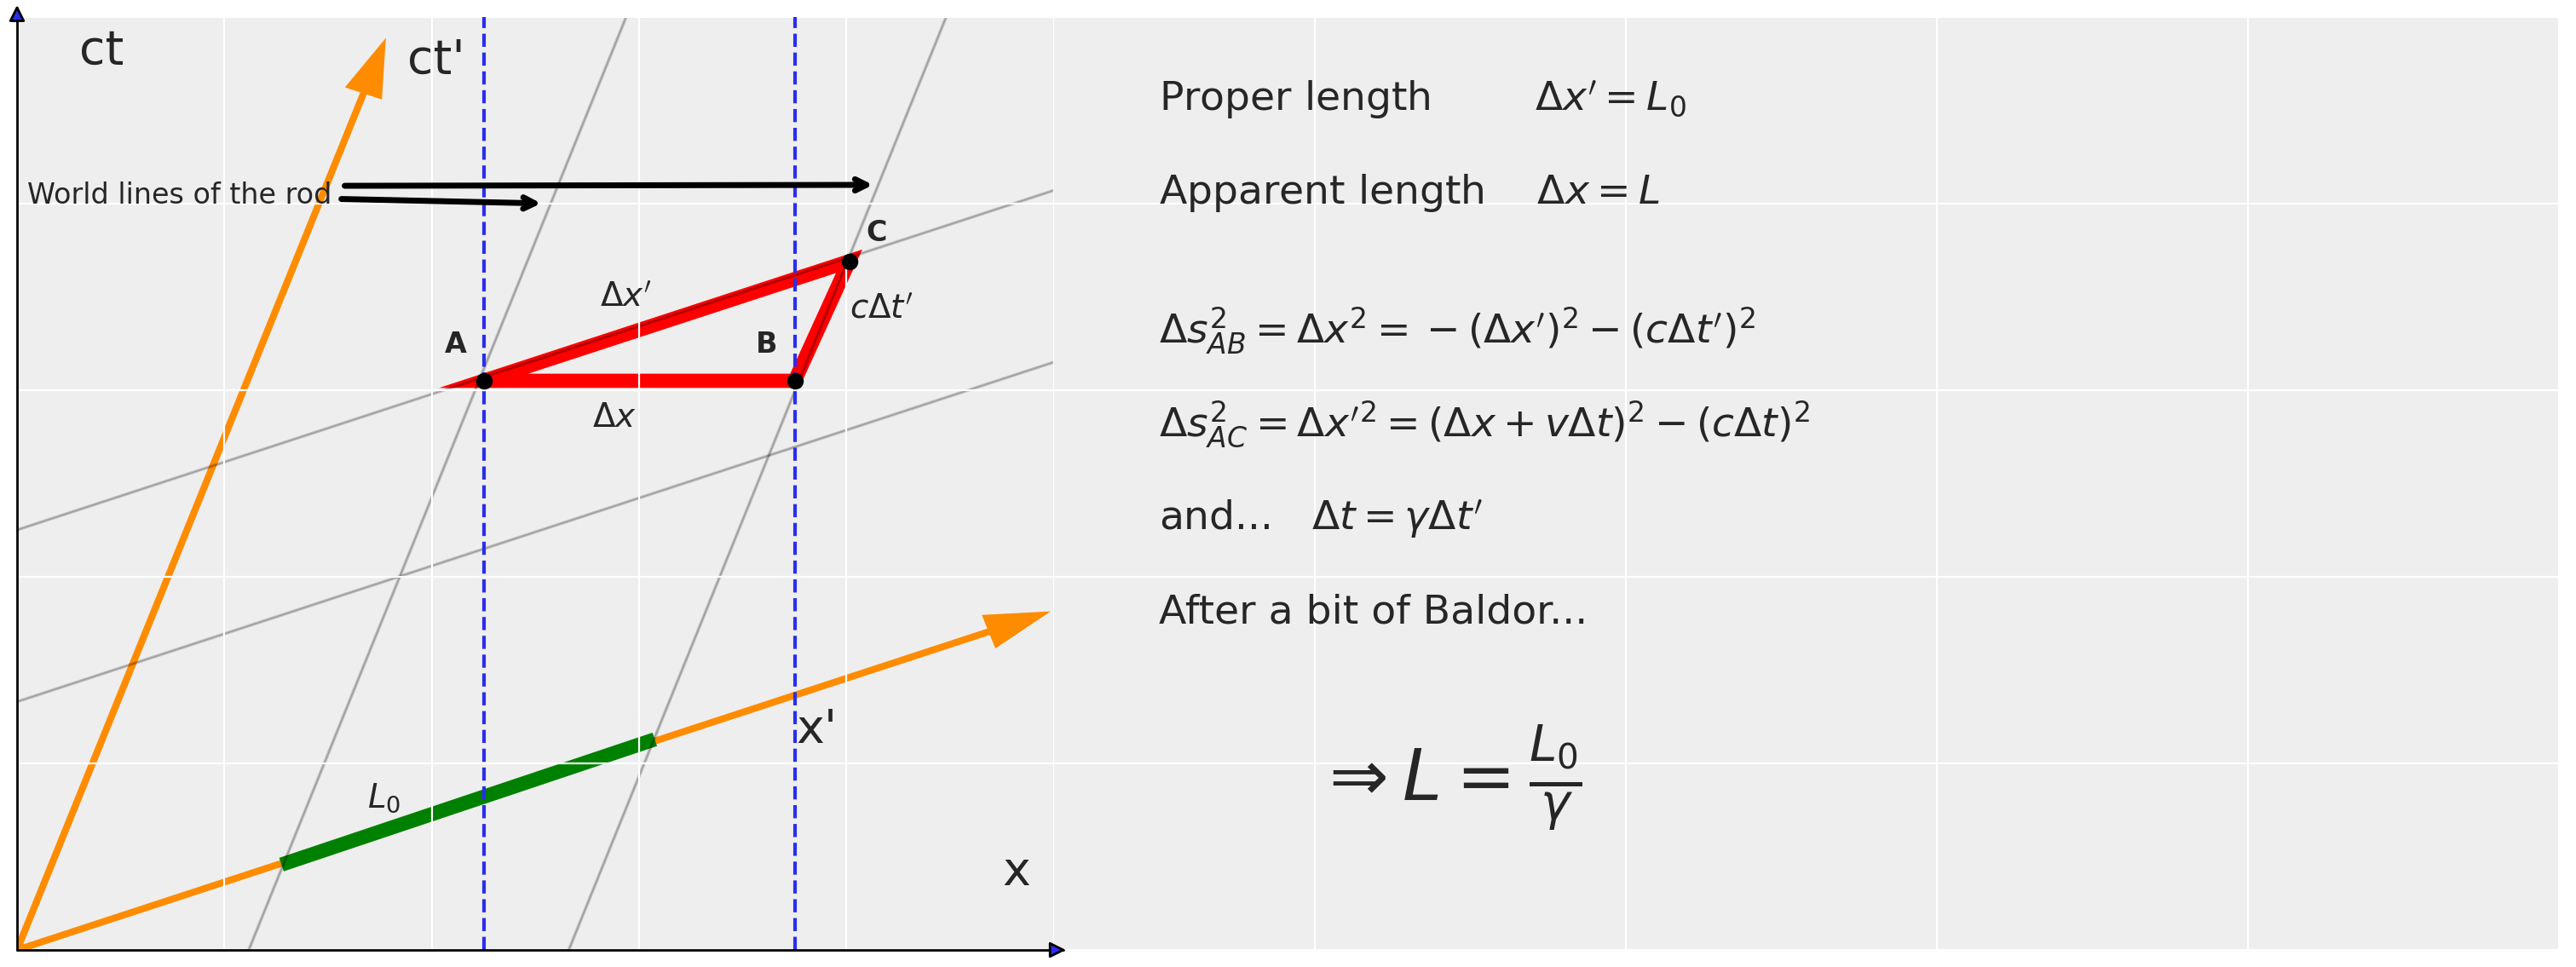

In [8]:
fig = plt.figure(figsize = (22, 22))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.6)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


########################################################################################
########################################################################################
## Notes
##
ax.annotate("Proper length        $\Delta x' = L_0$", 
            (0.1,0.9),   fontsize=17,
            )
##
ax.annotate("Apparent length    $\Delta x = L$", 
            (0.1,0.8),   fontsize=17,
            )
##
ax.annotate("$\Delta s^2_{AB} =  \Delta x^2 = - (\Delta x')^2  - (c\Delta t')^2$", 
            (0.1,0.65),   fontsize=17,
            )
##
ax.annotate("$\Delta s^2_{AC} =  \Delta x'^2 = (\Delta x+v\Delta t)^2 - (c\Delta t)^2 $", 
            (0.1,0.55),   fontsize=17,
            )
##
ax.annotate("and...   $\Delta t = \gamma \Delta t'$", 
            (0.1,0.45),   fontsize=17,
            )
##
ax.annotate("After a bit of Baldor...", 
            (0.1,0.35),   fontsize=17,
            )
##
ax.annotate(r"$\Rightarrow L = \frac{L_0}{\gamma}$", 
            (0.2,0.16),   fontsize=30,
            )

######  End Notes ...
########################################################################################



#########################################################################################################################
#########################################################################################################################
### Right part for annnotations ( 2 )

ax = fig.add_subplot(4,3,1, axes_class=AxesZero, aspect=0.9)
## Some Transformation
base = plt.gca().transData

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)

ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)
########################################################################################
## Rotated y axe
angle_t = -20
rot_t = transforms.Affine2D().rotate_deg(angle_t)
x_tail = 0.
y_tail = 0.
y_head = yh*0.98
x_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.03, lw=2.5,
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_t + base) #
########################################################################################
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.
x_head = yh*1.
y_head = 0.
dx = x_head - x_tail 
dy = y_head - y_tail
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.03, lw=2.5,
         head_length=0.05, fc='darkorange', ec='darkorange', transform= rot_x + base) #
########################################################################################
########################################################################################

## Anotate axes
plt.annotate("x",(0.95*xh, 0.07),  fontsize=20)
plt.annotate("ct",(0.06, 0.95*yh),  fontsize=20)
# Rotated ct' & x'
plt.annotate('x\'',(0.8*xh*np.cos(angle_x*np.pi/(180)), 0.65*xh*np.sin(angle_x*np.pi/(180))),  fontsize=20)
plt.annotate('ct\'',(1.1*yh*np.cos(np.pi/2-angle_x*np.pi/(180)), yh*np.sin(np.pi/2-angle_x*np.pi/(180))),  fontsize=20)


## H&V Lines
x1=0.75
y1=0.61
plt.vlines(x1,0.,11., linestyle='--')
plt.vlines(x1*0.6,0.,11., linestyle='--')

## point intersec
plt.plot([x1*0.6],[y1],'ko')
plt.annotate('A',(x1*0.55,y1*1.05),  fontsize=12,weight="bold")
plt.plot([x1],[(y1)],'ko')
plt.annotate('B',(x1*0.95,y1*1.05),  fontsize=12,weight="bold")
plt.plot([x1*1.07],[y1*1.21],'ko')
plt.annotate('C',(x1*1.07*1.02,y1*1.21*1.03),  fontsize=12,weight="bold")
plt.annotate("$\Delta x'$",(x1*0.75,(y1*1.13)),  fontsize=14,weight="bold")
plt.annotate("$c\Delta t'$",(x1*1.07,(y1*1.11)),  fontsize=14,weight="bold")
plt.annotate("$\Delta x$",(x1*0.74,(y1*0.92)),  fontsize=14,weight="bold")

# a Triangle
pivot_left = (x1*0.6,y1)
pivot_right = (x1,y1)
pivot_top = (x1*1.07,y1*1.21)
points = np.array([pivot_left, pivot_right, pivot_top])
pivot = plt.Polygon(points, closed=True, fill=False, edgecolor='r', lw=6.)
ax.add_patch(pivot)
# a Segment
pivot_left = (x1*0.34,y1*0.15)
pivot_right = (x1*0.82,y1*0.37)
points = np.array([pivot_left, pivot_right])
pivot = plt.Polygon(points, closed=False, fill=False, edgecolor='g', lw=6.)
ax.add_patch(pivot)
plt.annotate("$L_0$",(x1*0.45,y1*0.25),  fontsize=14,weight="bold")


## Notes
ax.annotate('World lines of the rod', 
            xy=(0.51,0.8), 
            xytext=(0.01, 0.8),   fontsize=12,
            arrowprops=dict(arrowstyle="->",lw=2.5))
## Notes
ax.annotate('                                  ', 
            xy=(0.83,0.82), 
            xytext=(0.01, 0.81),   fontsize=12,
            arrowprops=dict(arrowstyle="->",lw=2.5))


##############################################################################################
##############################################################################################
## Ploting two lines of simultaneity --
##############################################################################################
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.423
x_head = yh*1.5
y_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
## Rotated x axe
angle_x = -angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.
y_tail = 0.25
x_head = yh*1.5
y_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
##############################################################################################
## Rotated t axe
angle_x = angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.21
y_tail = 0.
y_head = yh*1.5
x_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
## Rotated t axe
angle_x = angle_t
rot_x = transforms.Affine2D().rotate_deg(angle_x)
x_tail = 0.5
y_tail = 0.
y_head = yh*1.5
x_head = 0.
# t' axis
ax.arrow(x_tail, y_tail, x_head, y_head, head_width=0.0, lw=0.9, alpha=0.2,
         head_length=0.0, fc='k', ec='k', transform= rot_x + base) #
##############################################################################################
##############################################################################################

plt.show()

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Equivalence Principle (Newtonian)

 </p>
</div>

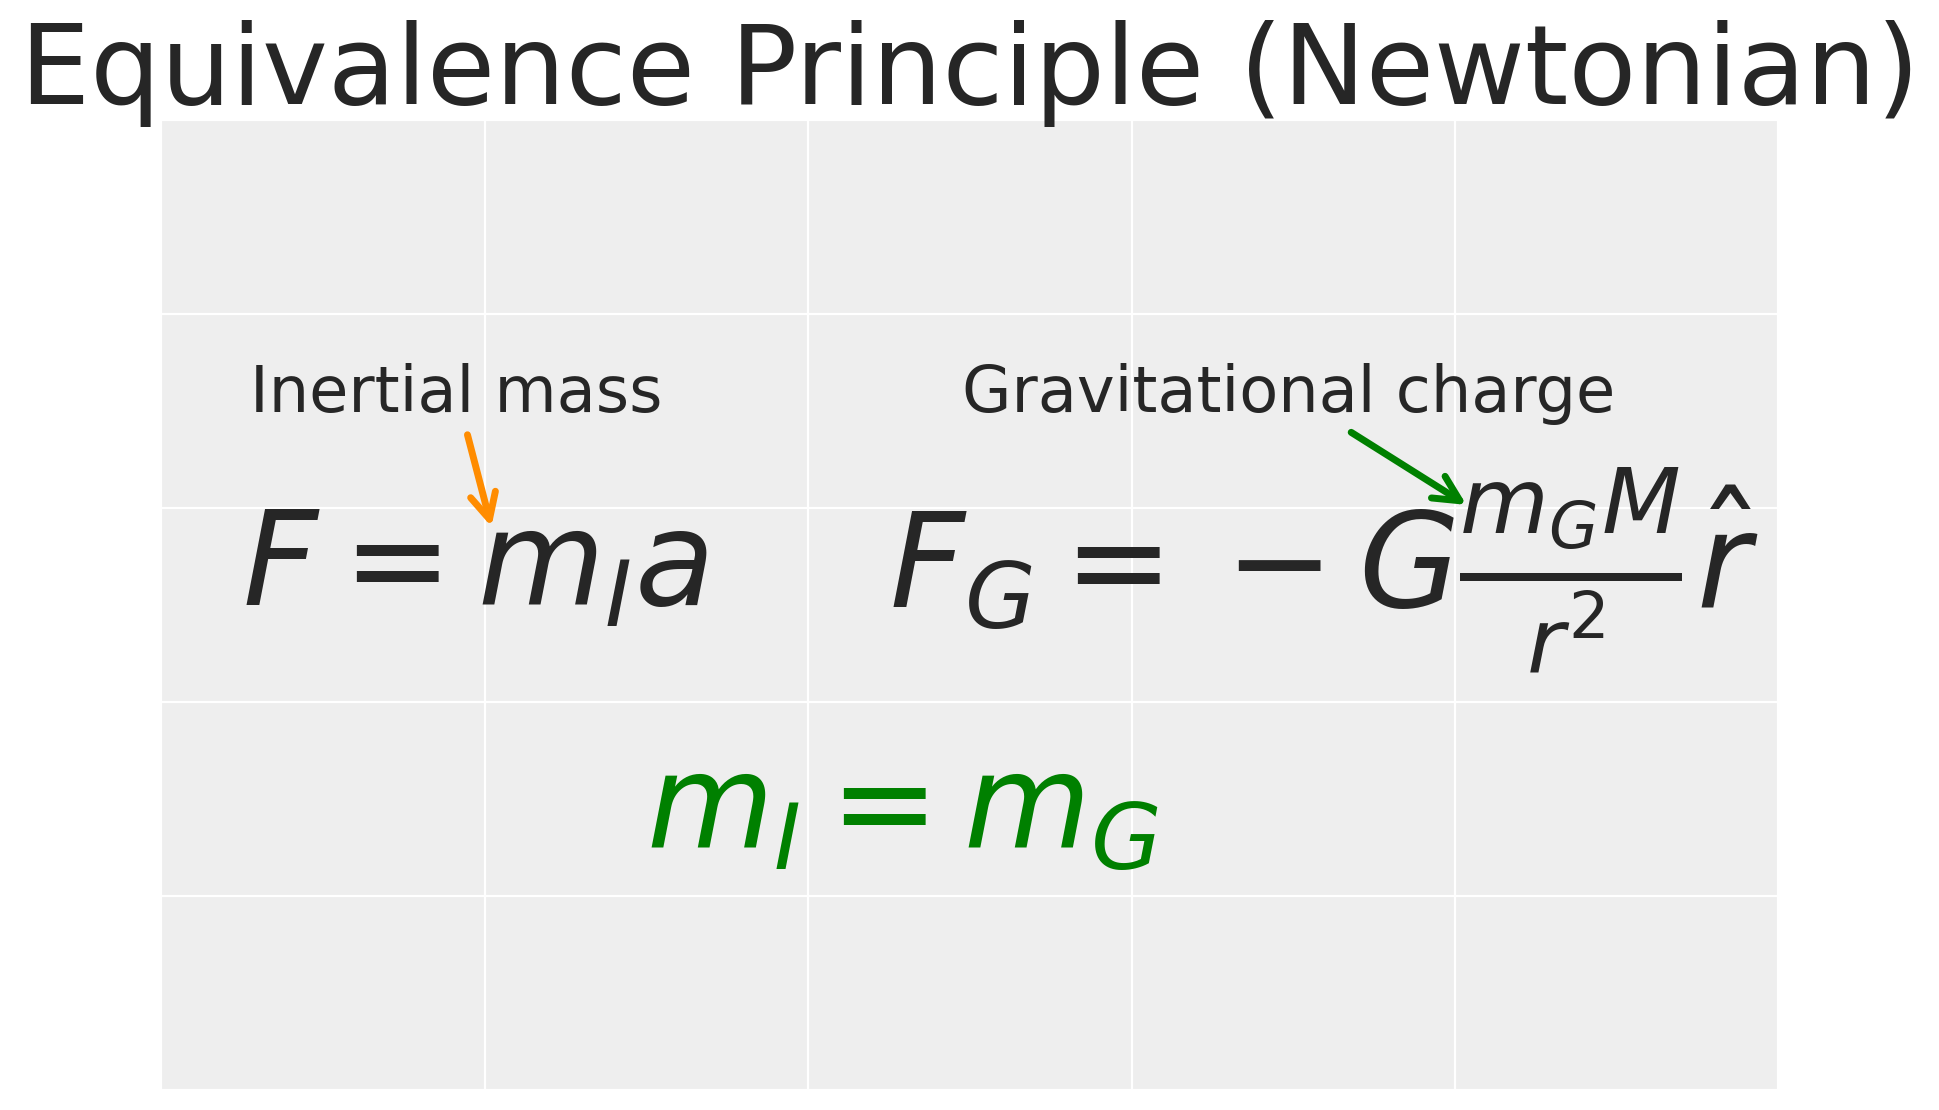

In [9]:
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.6)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


########################################################################################
########################################################################################

## Notes
y1=0.5
x1=0.05
ax.annotate('Inertial mass', 
            xy=(x1*4.1,y1*1.15), 
            xytext=(x1*1.1, y1*1.4),   fontsize=23,
            arrowprops=dict(arrowstyle="->",lw=2.5, color='darkorange'))

ax.annotate("$F=m_I a$", 
            (x1,y1),   fontsize=47,
            )
## Grav charge
y1=0.5
x1=0.45
ax.annotate('Gravitational charge', 
            xy=(x1*1.8,y1*1.2), 
            xytext=(x1*1.1, y1*1.4),   fontsize=23,
            arrowprops=dict(arrowstyle="->",lw=2.5, color='g'))

ax.annotate(r"$F_G=-G \frac{m_G M}{r^2} \hat{r}$", 
            (x1,y1),   fontsize=47,
            )
##
y1=0.25
x1=0.3
ax.annotate(r"$m_I = m_G $", 
            (x1,y1),   fontsize=47, color='g'
            )



######  End Notes ...
########################################################################################
plt.title("Equivalence Principle (Newtonian)",  fontsize=40)



plt.show()

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">   

#### 📌 “It was most unsatisfactory to me that, although the relation between inertia and energy is so beautifully derived [in Special Relativity], there is no relation between inertia and weight. I suspected that this relationship was inexplicable by means of Special Relativity”
Albert Einstein, 1922
    
</div> 

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Pseudo forces in a non-inertial frames (Newtonian)

 </p>
</div>

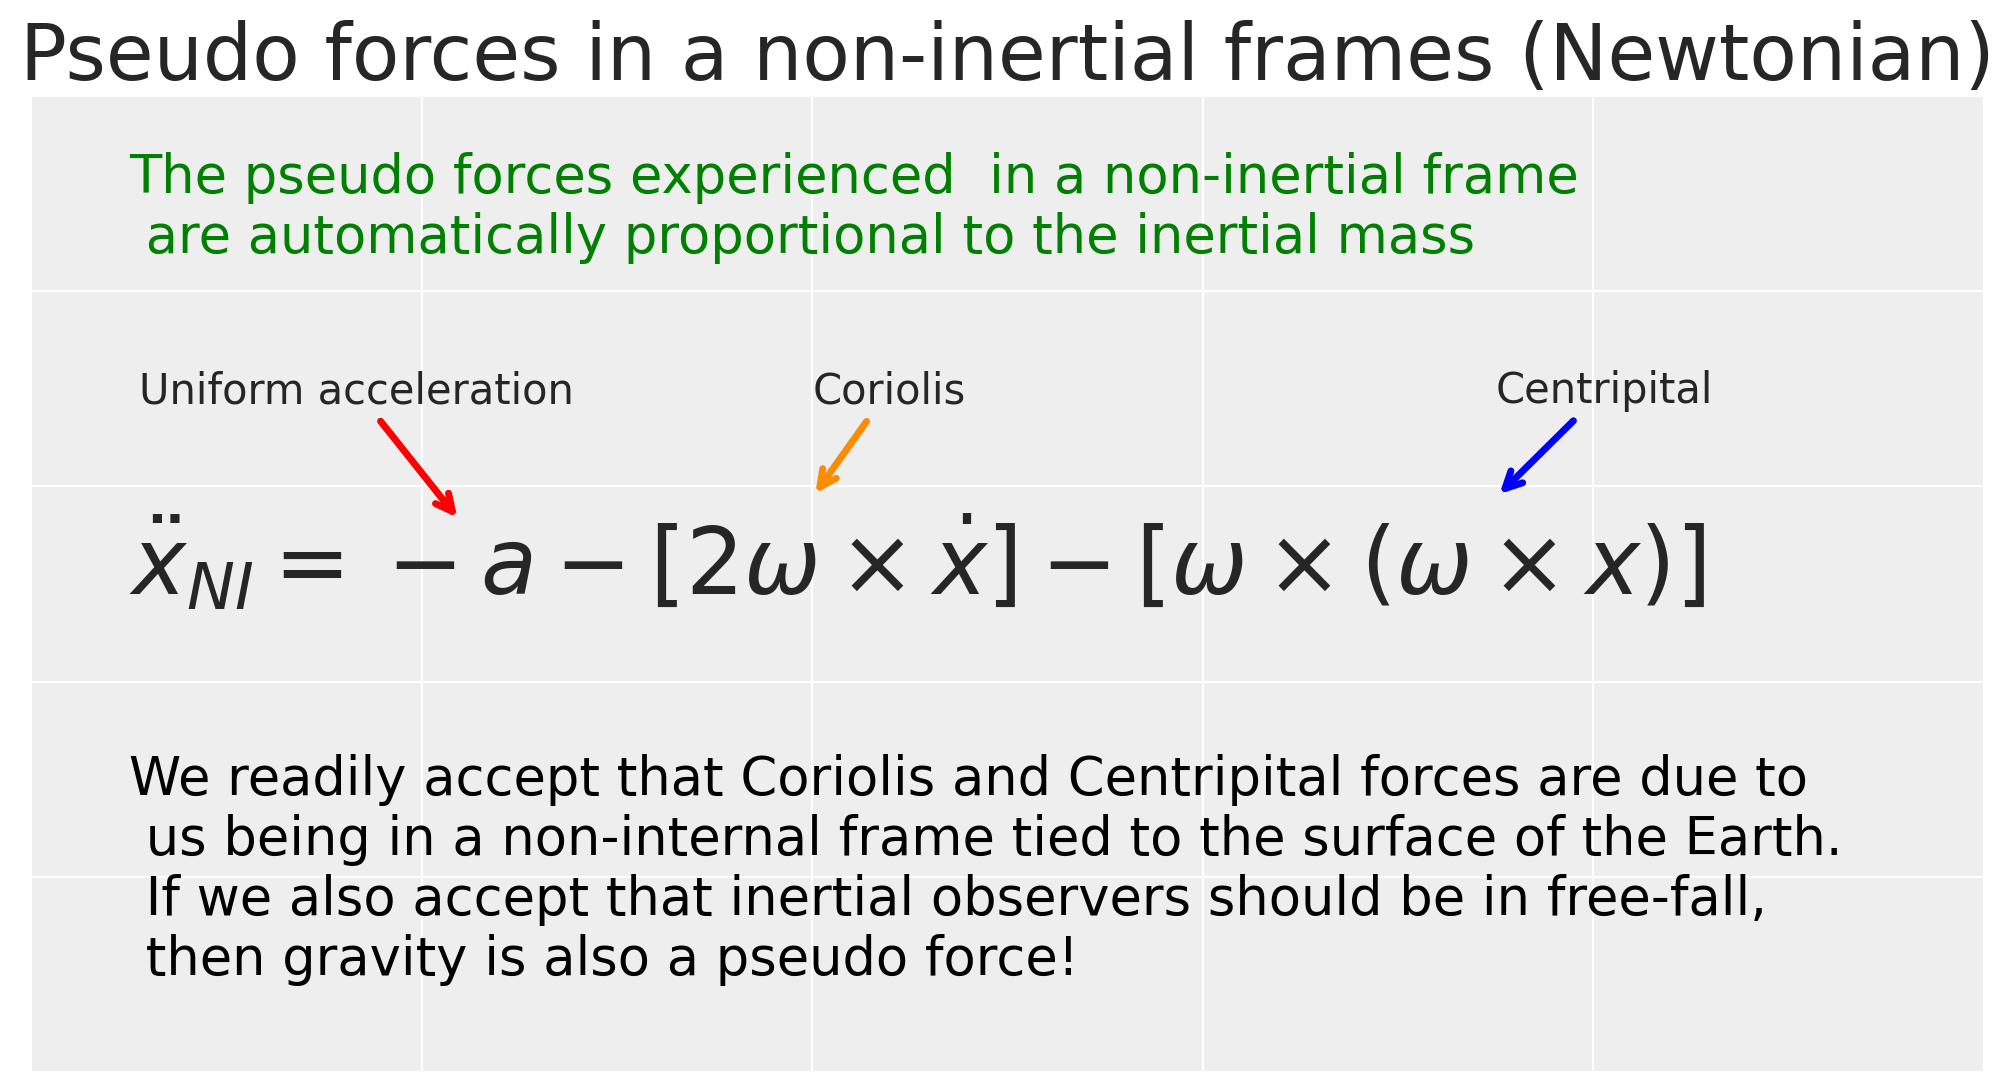

In [10]:
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.5)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


########################################################################################
########################################################################################
## Notes
y1=0.49
x1=0.05
ax.annotate('Coriolis', 
            xy=(x1+0.35,y1*1.2), 
            xytext=(x1+0.35, y1*1.4),   fontsize=15,
            arrowprops=dict(arrowstyle="->",lw=2.5, color='darkorange'))
ax.annotate('Uniform acceleration', 
            xy=(x1*4.4,y1*1.15), 
            xytext=(x1*1.1, y1*1.4),   fontsize=15,
            arrowprops=dict(arrowstyle="->",lw=2.5, color='r'))
ax.annotate('Centripital', 
            xy=(x1+0.7,y1*1.2), 
            xytext=(x1+0.7, y1*1.4),   fontsize=15,
            arrowprops=dict(arrowstyle="->",lw=2.5, color='blue'))

ax.annotate(r"$\ddot{x}_{NI}=-a - [2 \omega \times \dot{x}] - [\omega \times (\omega \times x)]$", 
            (x1,y1),   fontsize=33,
            )
########
y1=0.84
x1=0.05
ax.annotate("The pseudo forces experienced  in a non-inertial frame \n \
are automatically proportional to the inertial mass",
            (x1,y1),   fontsize=19, color='g'
            )

########
y1=0.1
x1=0.05
ax.annotate("We readily accept that Coriolis and Centripital forces are due to \n \
us being in a non-internal frame tied to the surface of the Earth. \n \
If we also accept that inertial observers should be in free-fall, \n \
then gravity is also a pseudo force!",
            (x1,y1),   fontsize=19, color='k'
            )


######  End Notes ...
########################################################################################
plt.title("Pseudo forces in a non-inertial frames (Newtonian)",  fontsize=28)



plt.show()

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">   

#### 📌 This is exactly what Einstein reasoned: “I was sitting in a chair in the patent office in Bern when all of a sudden a thought occurred to me: ‘If a person falls freely he will not feel his own weight’. I was startled. This simple thought made a deep impression upon me. It impelled me towards a theory of gravitation”
    
</div> 
    

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Gravity as Geometry

 </p>
</div>

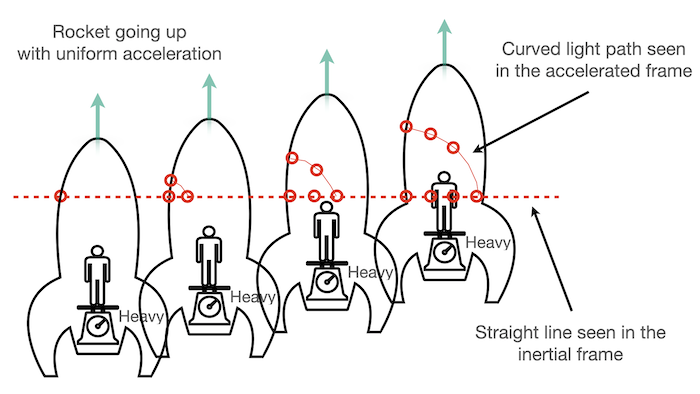

In [11]:
%matplotlib inline

# General imports
from itertools import product
import matplotlib
import numba
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Basic imports and functions
from sympy import latex, symbols, sin, cos, pi, simplify, lambdify, Matrix
from scipy.integrate import solve_ivp

from sympy.diffgeom import (
    Manifold,
    Patch,
    CoordSystem,
    metric_to_Christoffel_2nd,
    TensorProduct as TP
)

def lprint(v):
    display(Math(latex(v)))

In [12]:
# Create a manifold.
M = Manifold('M', 4)

# Create a patch.
patch = Patch('P', M)

# Basic symbols
c, acc = symbols('c acc')

# Coordinate system
cartes_coord = CoordSystem('cartesian', patch, ['t', 'x', 'y', 'z'])

# Get the coordinate functions
t, x, y, z = cartes_coord.coord_functions()

# Get the base one forms.
dt, dx, dy, dz = cartes_coord.base_oneforms()

# Auxiliar terms for the metric.
dt_2 = TP(dt, dt)
dx_2 = TP(dx, dx)
dy_2 = TP(dy, dy)
dz_2 = TP(dz, dz)
factor = (1 + 2*acc*z / c**2)

# Build the metric
metric = -factor * c ** 2 * dt_2 + dx_2 + dy_2 + dz_2

# Get the Christoffel symbols of the second kind.
christoffel = metric_to_Christoffel_2nd(metric)
# Let's print this in an elegant way ;)
for i, j, k in product(range(4), range(4), range(4)):
    if christoffel[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j},{k}}} = ' + latex(christoffel[i, j, k])))

/opt/conda/lib/python3.7/site-packages/sympy/diffgeom/diffgeom.py:274: SymPyDeprecationWarning: 

Passing str as coordinate symbol's name has been deprecated since
SymPy 1.7. Use Symbol which contains the name and assumption for
coordinate symbol instead. See
https://github.com/sympy/sympy/issues/19321 for more info.

  deprecated_since_version="1.7"


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


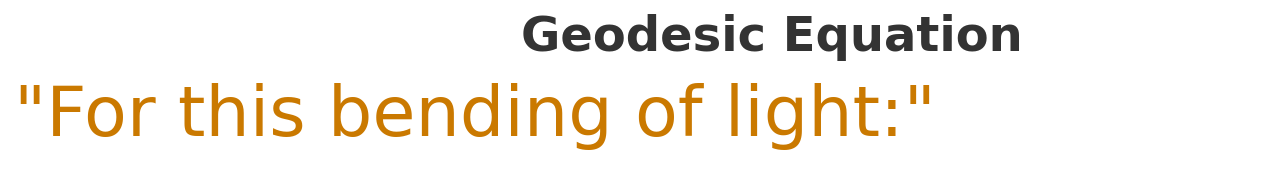

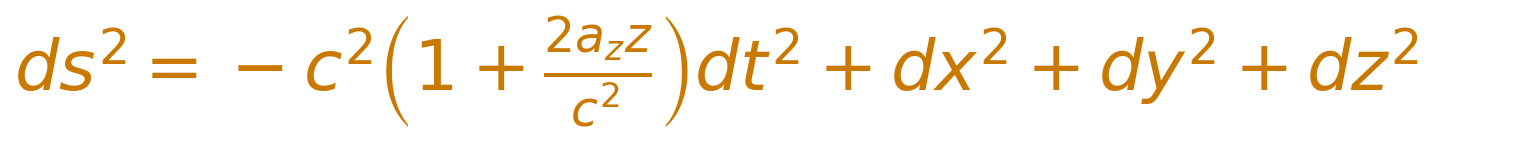

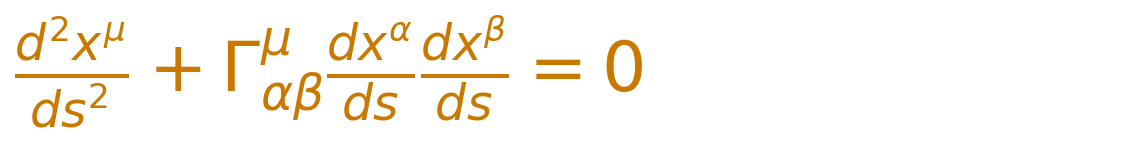

In [13]:
## Here we write the Eq.
myEq1={1: "\"For this bending of light:\"",
       2: 
    r"$ds^2 = -c^2 \left(1+\frac{2a_z z}{c^2}  \right) dt^2 + dx^2 +dy^2 +dz^2$",
       3: 
    r"$\frac{d^2x^{\mu}}{ds^2} + \Gamma^{\mu}_{\alpha\beta}  \frac{dx^{\alpha}}{ds} \frac{dx^{\beta}}{ds} = 0 $"
}
#
myTitle='Geodesic Equation'    
## Here we plot it 
doall(myTitle,myEq1[1])
doall("",myEq1[2])
doall("",myEq1[3])

In [14]:
g_func = lambdify((c, acc, z), christoffel, modules='numpy')

## Specify c and r_s
def F(t, y):
    u = np.array(y[0:4])
    v = np.array(y[4:8])

    chris = g_func(1, 1, u[3])

    du = v
    dv = -np.dot(np.dot(chris, v), v)

    return np.concatenate((du, dv))

## Running parameters

In [15]:
T = 60
pos_init=[0.001, 0.3, 0.1, 6.]
vel_init=[0.55, (1), 0., 0.]
## The solver --
sol_Bend_of_light = solve_ivp(F, [0, T], (pos_init+vel_init), t_eval=np.linspace(0, T, int(T * 123 + 1)))

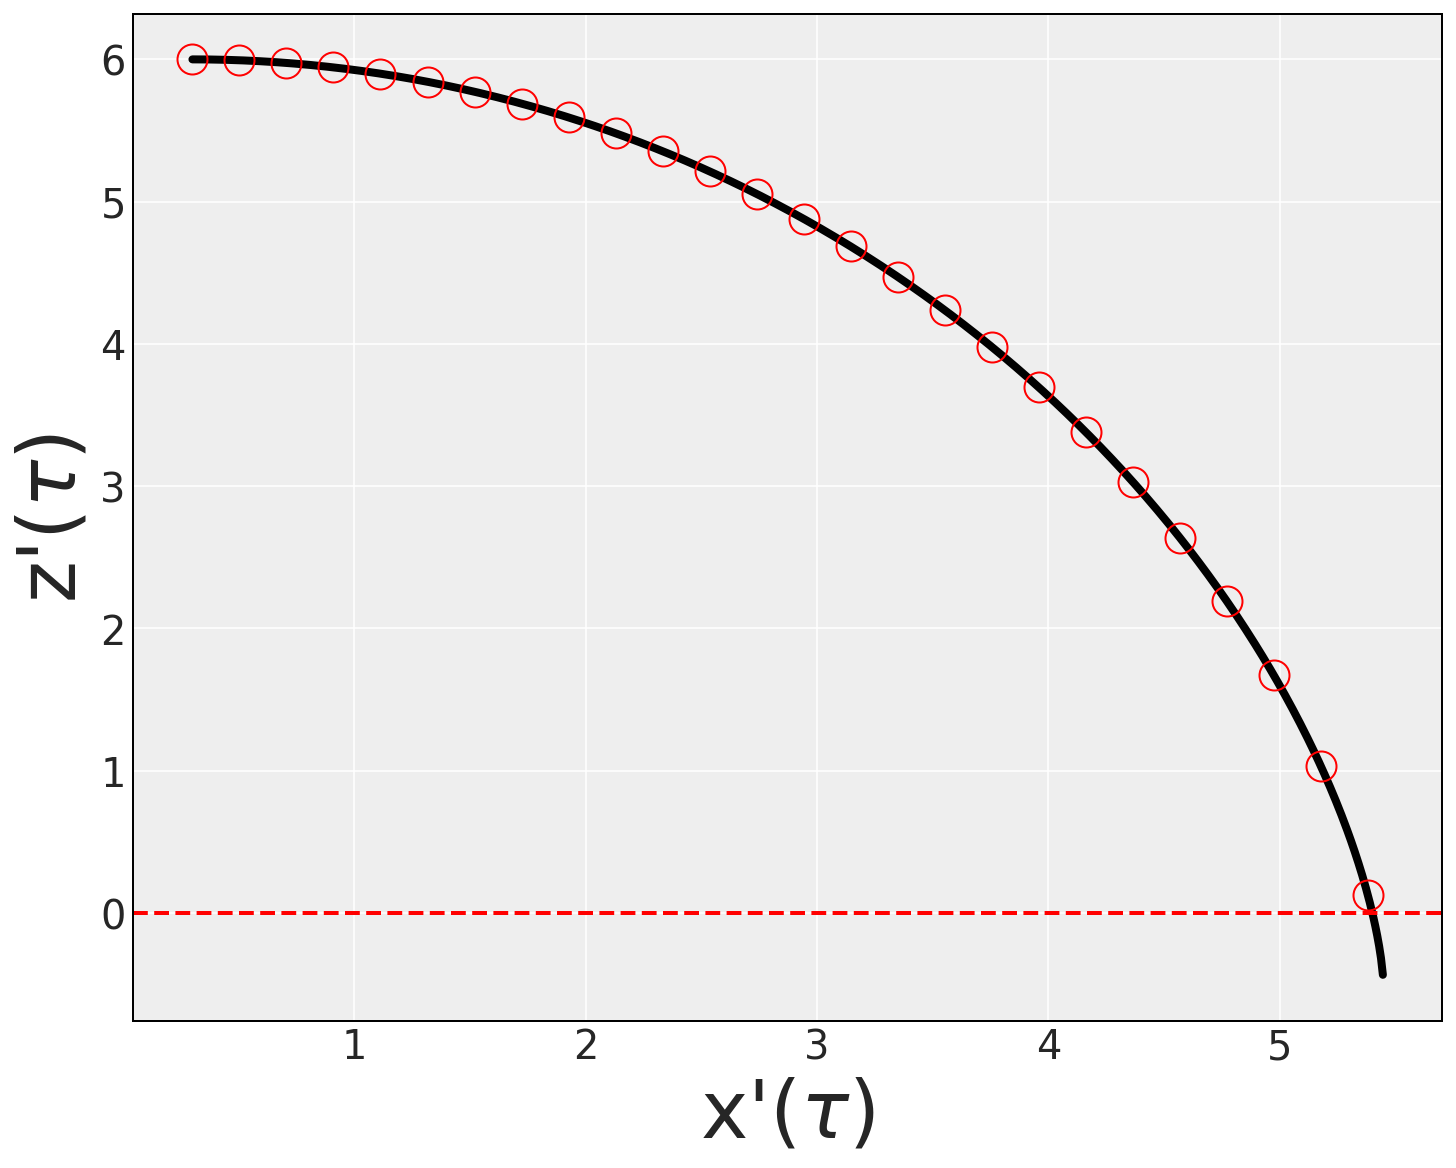

In [28]:
# Variables to plot
zplot=sol_Bend_of_light.y[3]
xplot=sol_Bend_of_light.y[1]

# New figure
fig=plt.figure(figsize=(10, 8),)
ax = fig.subplots(1, 1,  sharex=True, sharey=True)

# Extract solution 
plt.plot(xplot, zplot, lw=4., c='k')
plt.plot(xplot[::25], zplot[::25], 'ro', fillstyle='none', markersize=15)

ax = plt.gca()

ax.axhline(0, color="red", ls='--', lw=2)

#plt.grid()
plt.xlabel(r"x'($\tau$)",fontsize=40)
plt.xticks(fontsize=20)
plt.ylabel(r"z'($\tau$)",fontsize=40)
plt.yticks(fontsize=20)

## Borders
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

plt.show()

<div class="alert alert-block alert-info" style="font-size:24px; font-family:verdana; line-height: 1.7em;">   

#### 📌 This indeed confirms that photons do follow parabolic paths in the x-z spacetime plane.
    
</div> 

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Riemannian Geometry and Geodesics

 </p>
</div>

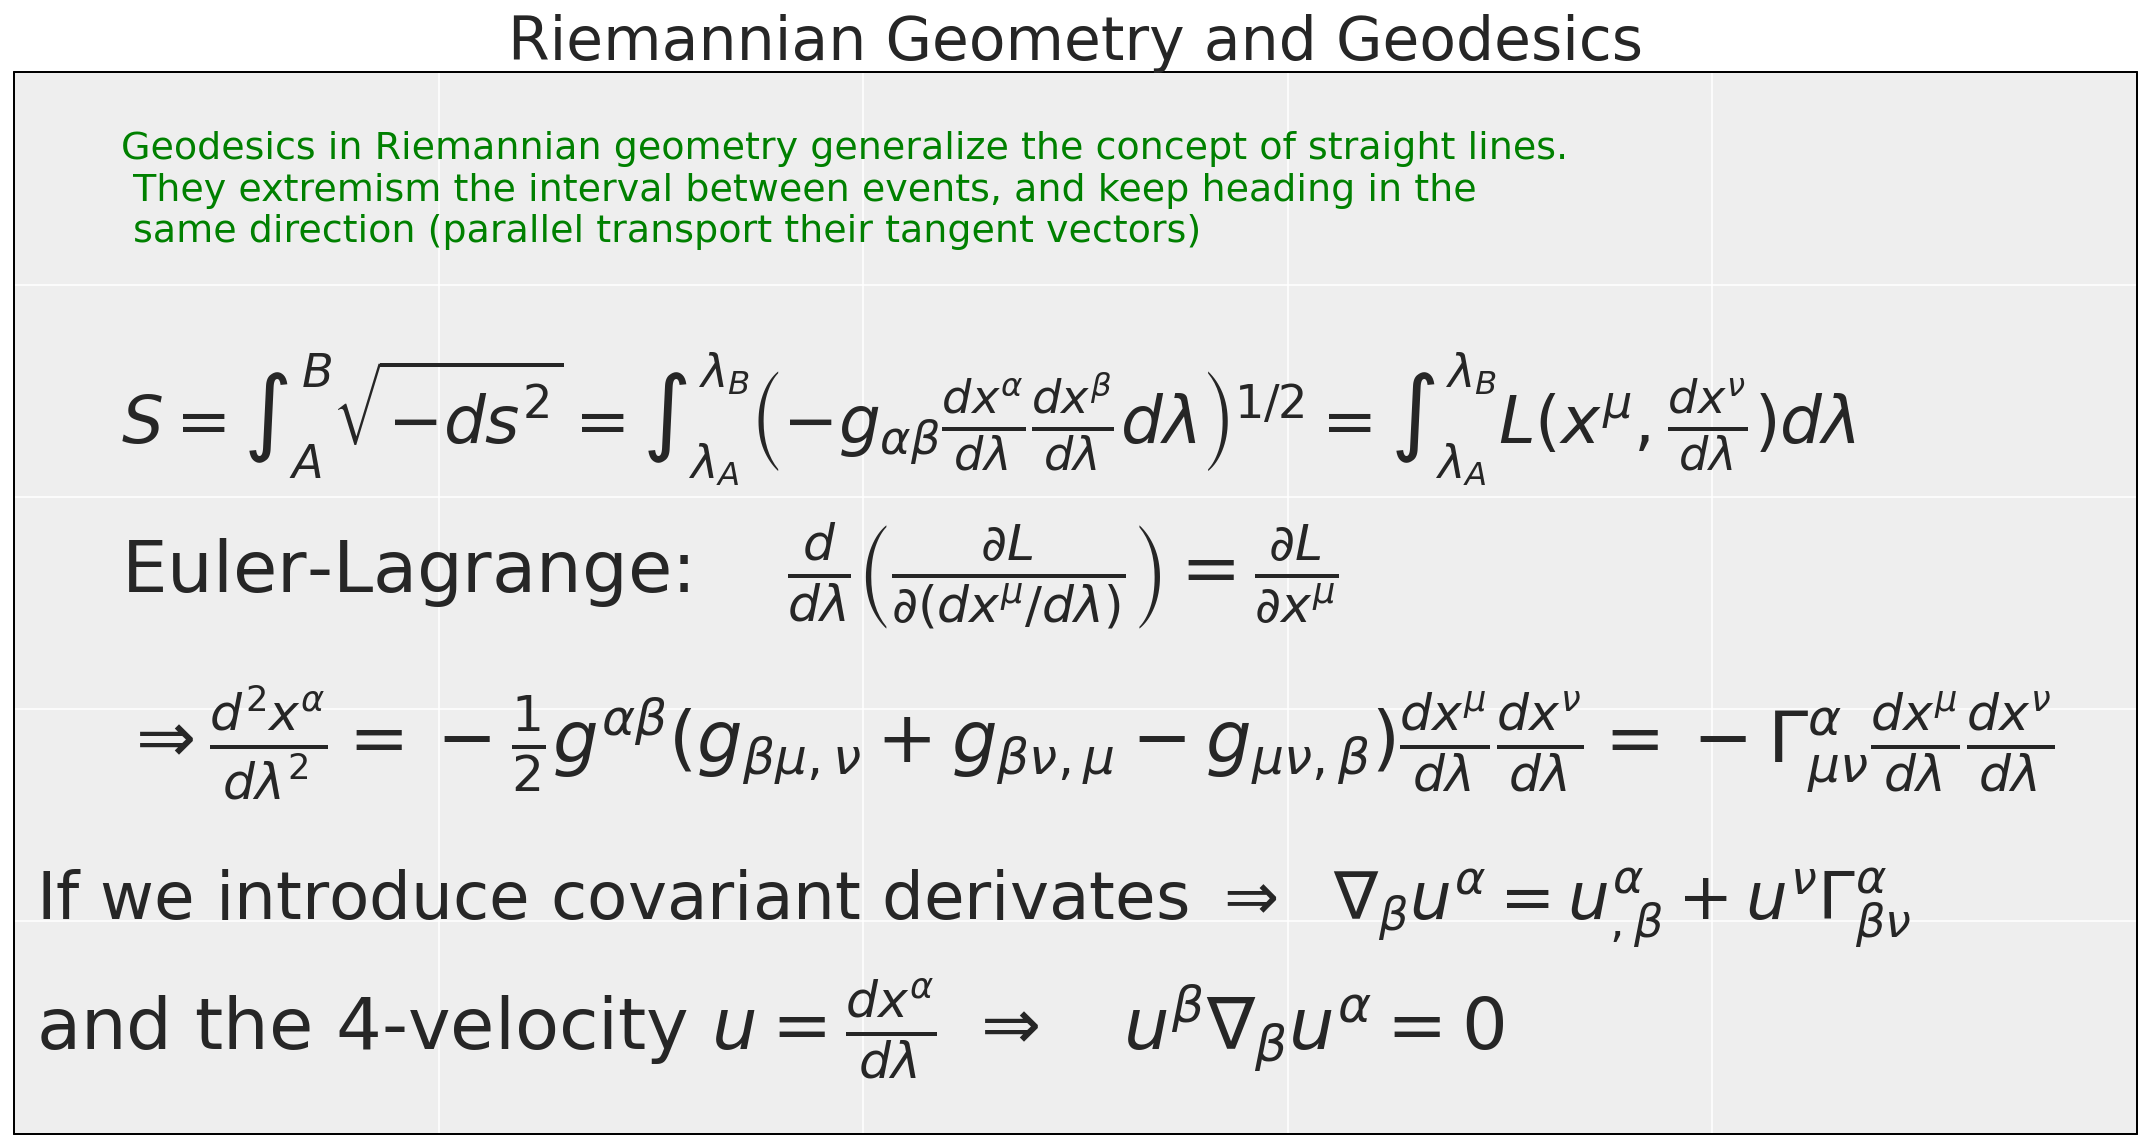

In [25]:
fig = plt.figure(figsize = (20, 30))
ax = fig.add_subplot(4,1,1, axes_class=AxesZero, aspect=0.5)

## Square of the plot 
xl,xh = 0., 1.
yl,yh = xl,xh
plt.xlim(xl,xh)
plt.ylim(yl,yh)


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.set_xticklabels("", visible=False)
ax.set_yticklabels("", visible=False)


########################################################################################
########################################################################################
########
y1=0.84
x1=0.05
ax.annotate("Geodesics in Riemannian geometry generalize the concept of straight lines. \n \
They extremism the interval between events, and keep heading in the \n \
same direction (parallel transport their tangent vectors)",
            (x1,y1),   fontsize=19, color='g'
            )

## Notes
y1=0.65
x1=0.05
ax.annotate(r"$S = \int^B_A {\sqrt{-ds^2}} ="
r"\int^{\lambda_B}_{\lambda_A} \left( -g_{\alpha\beta} \frac{dx^{\alpha}}{d\lambda} \frac{dx^{\beta}}{d\lambda} d\lambda \right)^{1/2}="
            r"\int^{\lambda_B}_{\lambda_A} L (x^{\mu}, \frac{dx^{\nu}}{d\lambda})d\lambda$", 
            (x1,y1),   fontsize=33,
            )

## Notes
y1=0.51
x1=0.05
ax.annotate(r"Euler-Lagrange:    "
            r"$ \frac{d}{d\lambda} \left(  \frac{\partial L}{\partial(dx^{\mu}/d\lambda) }   \right)="
            r"  \frac{\partial L}{\partial x^{\mu} }  $", 
            (x1,y1),   fontsize=36,
            )


## Notes
y1=0.35
x1=0.05
ax.annotate(r"$\Rightarrow  \frac{d^2x^{\alpha}}{d\lambda^2} ="
            r"-\frac{1}{2}g^{\alpha\beta} ( g_{\beta\mu,\nu} + g_{\beta\nu,\mu}  - g_{\mu\nu,\beta} ) \frac{dx^{\mu}}{d\lambda}\frac{dx^{\nu}}{d\lambda}="
            r"-\Gamma^{\alpha}_{\mu\nu}  \frac{dx^{\mu}}{d\lambda} \frac{dx^{\nu}}{d\lambda}$", 
            (x1,y1),   fontsize=36,
            )

## Notes
y1=0.2
x1=0.01
ax.annotate(r"If we introduce covariant derivates $\Rightarrow$  "
            r"$\nabla_{\beta} u^{\alpha} = u_{,\beta}^{\alpha} + u^{\nu}\Gamma_{\beta\nu}^{\alpha}$",
            (x1,y1),   fontsize=33,
            )

## Notes
y1=0.08
x1=0.01
ax.annotate(    
            r"and the 4-velocity $u=\frac{dx^{\alpha}}{d\lambda}$"
            r" $\Rightarrow$   $u^{\beta}  \nabla_{\beta} u^{\alpha}=0 $", 
            (x1,y1),   fontsize=36,
            )

######  End Notes ...
########################################################################################
plt.title("Riemannian Geometry and Geodesics",  fontsize=30)



plt.show()

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#42c497;
           font-size:310%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 Gravitational waves - LIGO and PyCBC

 </p>
</div>

![](https://upload.wikimedia.org/wikipedia/en/thumb/2/23/Aerial_view_of_LIGO_facility_in_Hanford%2C_Washington.jpg/220px-Aerial_view_of_LIGO_facility_in_Hanford%2C_Washington.jpg)

Credit: Wikipedia

https://github.com/gwastro/PyCBC-Tutorials


# Tutorial 1: Accesing Gravitational waves data:
https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/1_CatalogData.ipynb

# Tutorial 2: Data visualization and basic signal processing:
https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/2_VisualizationSignalProcessing.ipynb